# Naive Bayes Gaussian (Cardiovascular Disease Prediction)

## Explanation

### Objective

created a machine learning model that can predict whether a person has cardiovascular disease or not, using the Naive Bayes algorithm.

### Column Descriptions

- **Age** = The age of the person in days
- **Height** = The height of the person
- **Weight** = The weight of the person
- **Gender** = The gender of the person
- **Systolic blood pressure | ap_hi** = The systolic blood pressure of the person
- **Diastolic blood pressure | ap_lo** = The diastolic blood pressure of the person
- **Cholesterol (1: normal, 2: above normal, 3: well above normal)** = The cholesterol level of the person
- **Glucose (1: normal, 2: above normal, 3: well above normal)** = The glucose level of the person
- **Smoking | smoke (binary)** = Is the person smoking or not
- **Alcohol intake | alco (binary)** = Is the person taking alcohol or not
- **Physical activity | active (binary)** = Is the person doing physical activity or not
- **Presence or absence of cardiovascular disease | cardio (binary)** = Is the person got cardiovascular disease or not

## A. Data Preparation

### A.1 Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [42]:
try:
    df = pd.read_csv('cardiovascular.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [43]:
df.shape

(70000, 14)

### A.4 Viewing Data Informations

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB


### A.5 Viewing Data Statistics

In [45]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,70000.00,34999.50,20207.40,0.00,17499.75,34999.50,52499.25,69999.00
id,70000.00,49972.42,28851.30,0.00,25006.75,50001.50,74889.25,99999.00
age,70000.00,19468.87,2467.25,10798.00,17664.00,19703.00,21327.00,23713.00
gender,70000.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
height,70000.00,164.36,8.21,55.00,159.00,165.00,170.00,250.00
weight,70000.00,74.21,14.40,10.00,65.00,72.00,82.00,200.00
ap_hi,70000.00,128.82,154.01,-150.00,120.00,120.00,140.00,16020.00
ap_lo,70000.00,96.63,188.47,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.00,0.37,0.68,0.00,0.00,0.00,1.00,2.00
gluc,70000.00,0.23,0.57,0.00,0.00,0.00,0.00,2.00


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [46]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [47]:
df.tail()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993.0,19240.0,1,168.0,76.0,120.0,80.0,0,0,1,0,1,0
69996,69996,99995.0,22601.0,0,158.0,126.0,140.0,90.0,1,1,0,0,1,1
69997,69997,99996.0,19066.0,1,183.0,105.0,180.0,90.0,2,0,0,1,0,1
69998,69998,99998.0,22431.0,0,163.0,72.0,135.0,80.0,0,1,0,0,0,1
69999,69999,99999.0,20540.0,0,170.0,72.0,120.0,80.0,1,0,0,0,1,0


### A.7 Viewing Duplicated Data

In [48]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [49]:
df.isna().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### A.9 Viewing Outliers Data

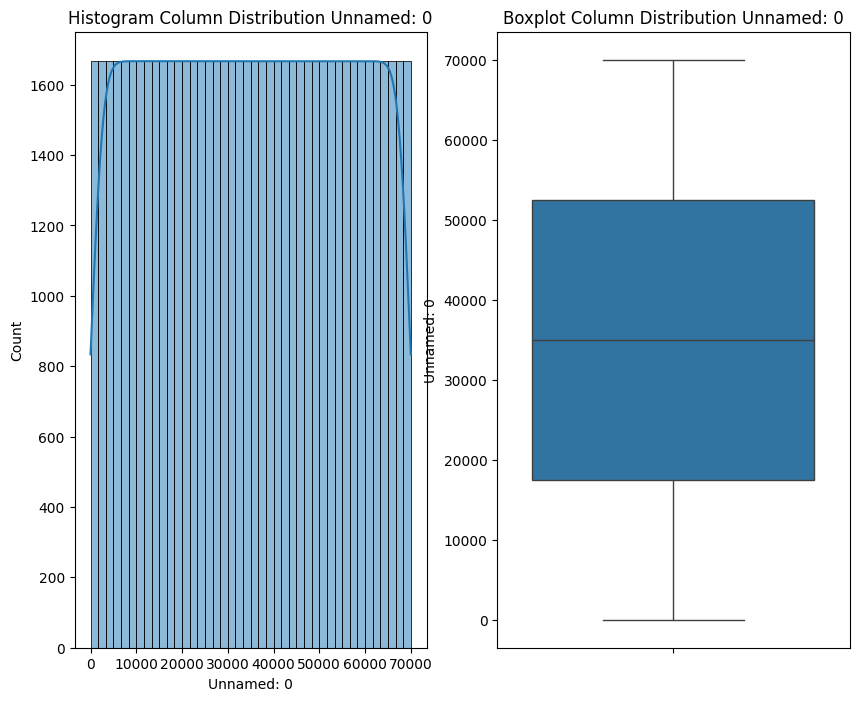

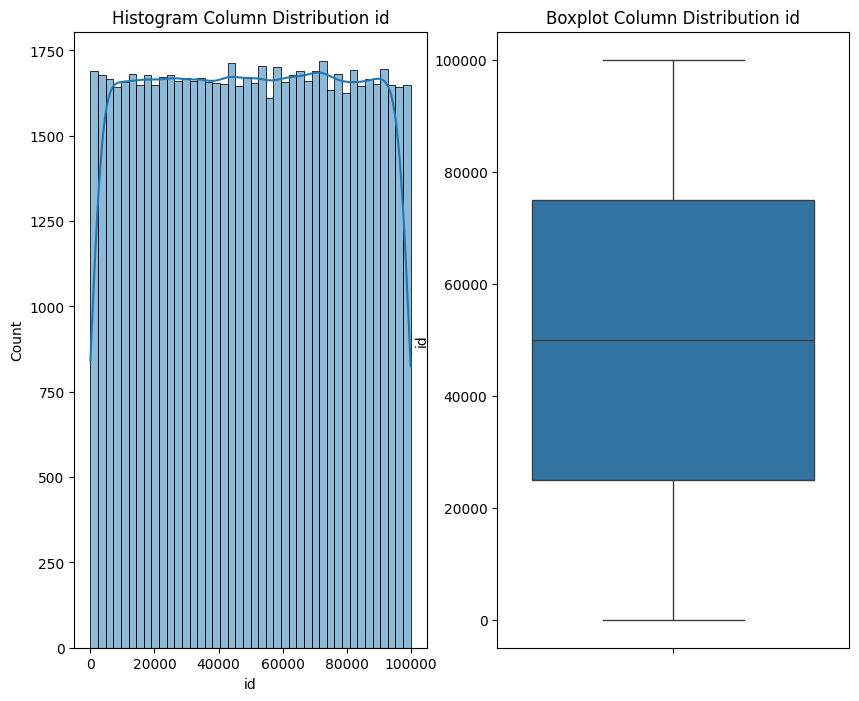

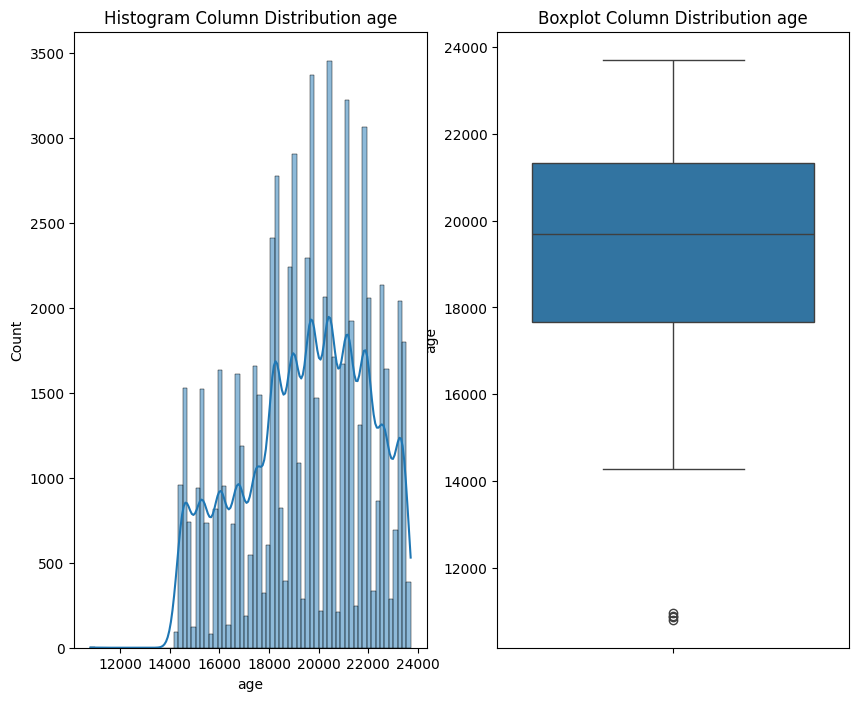

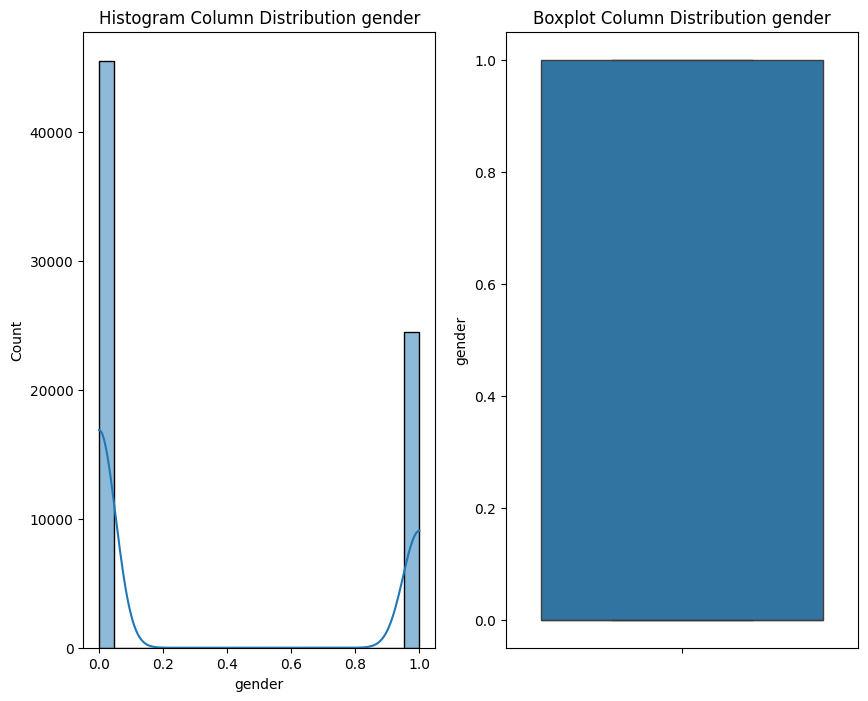

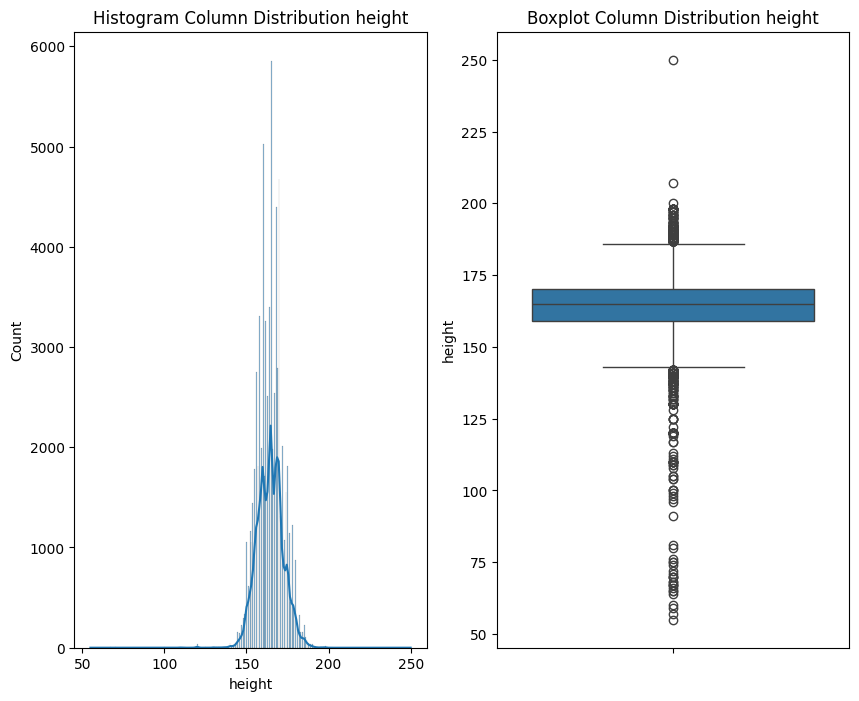

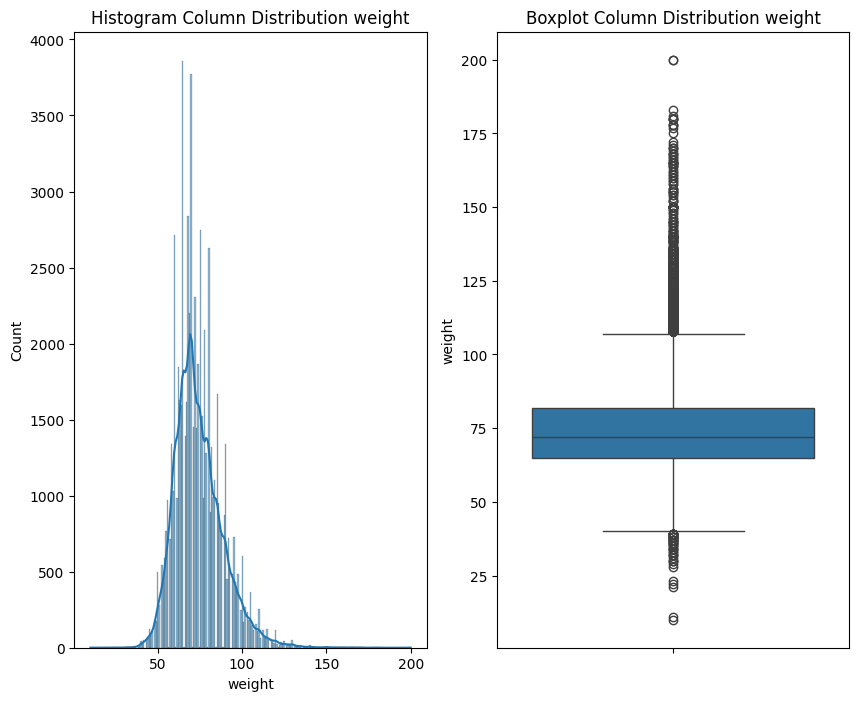

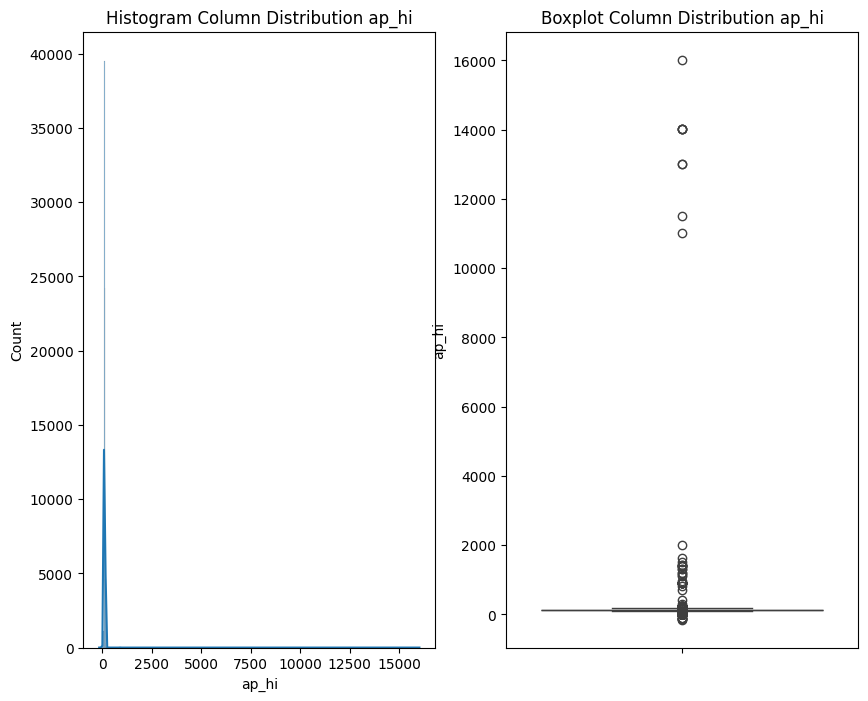

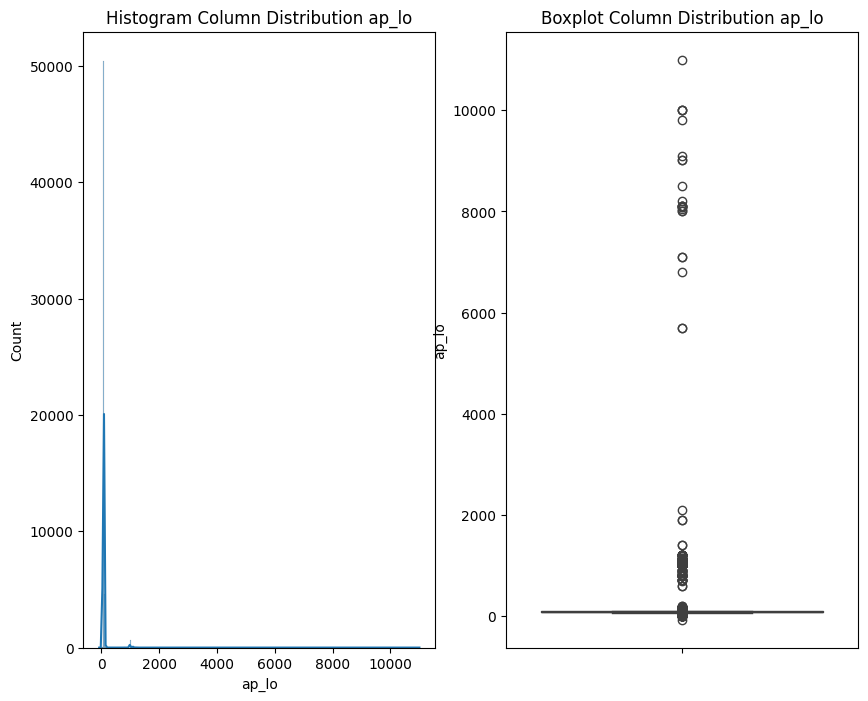

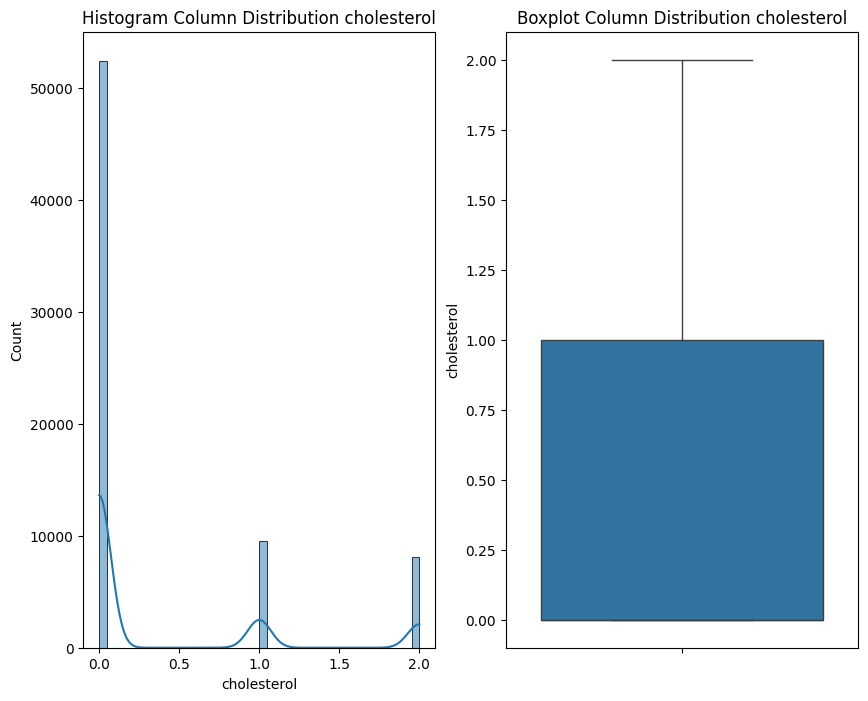

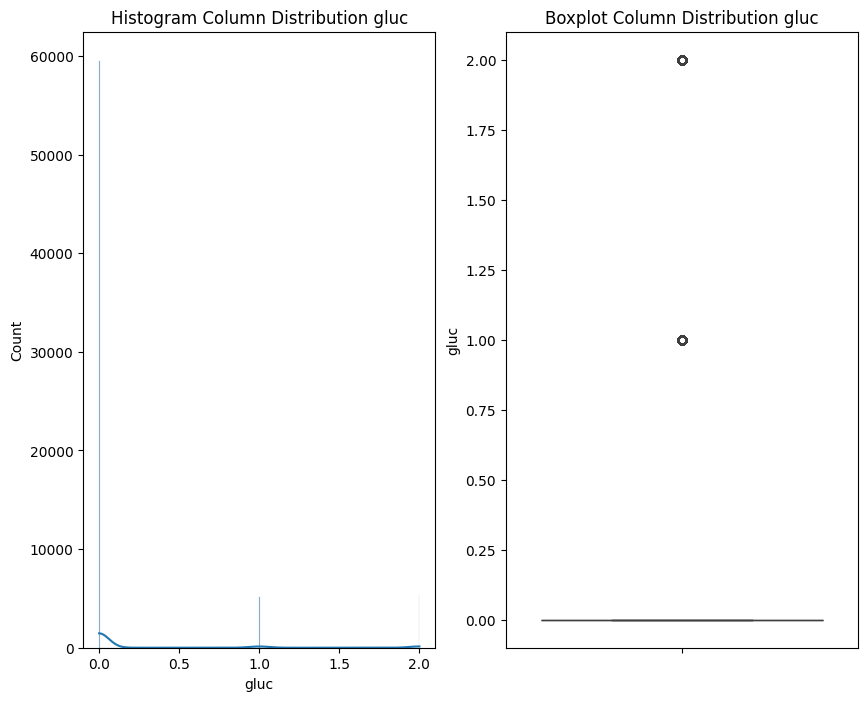

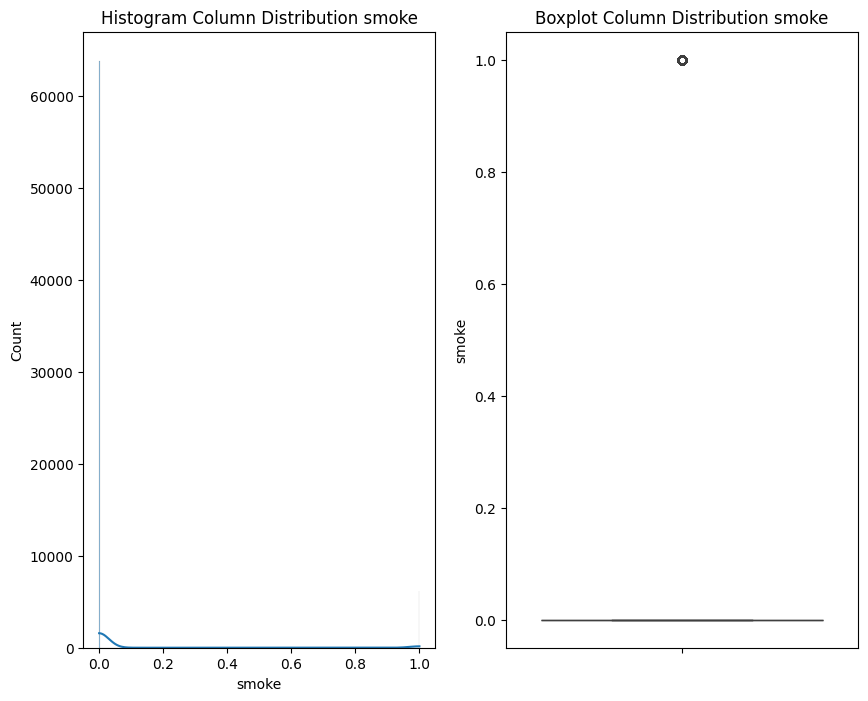

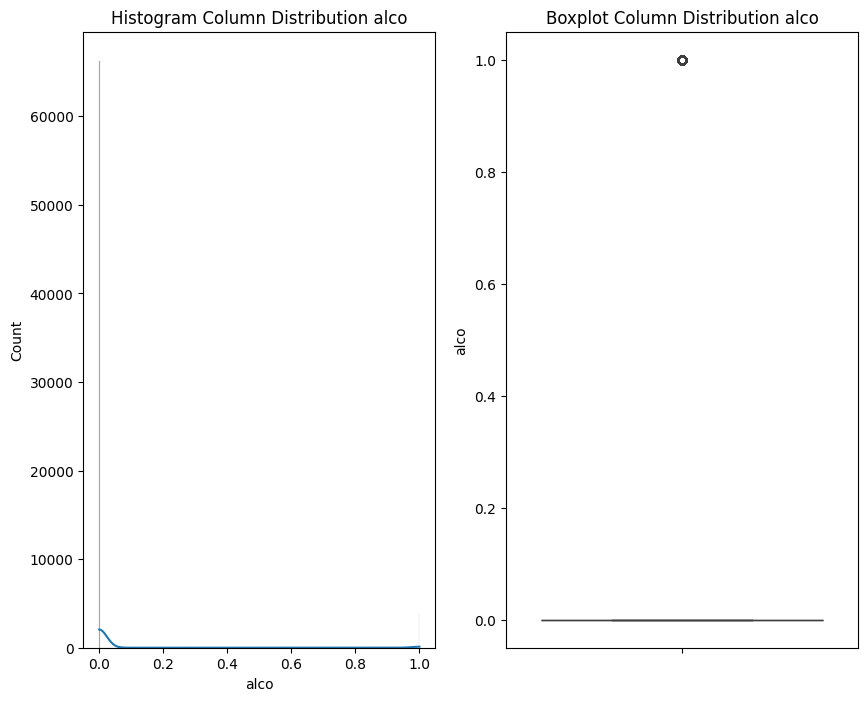

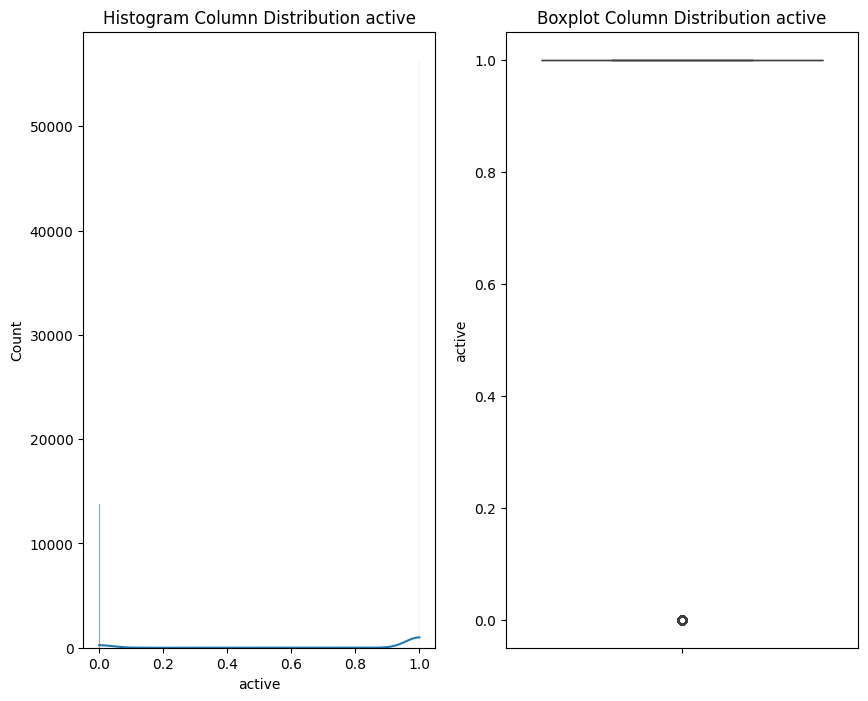

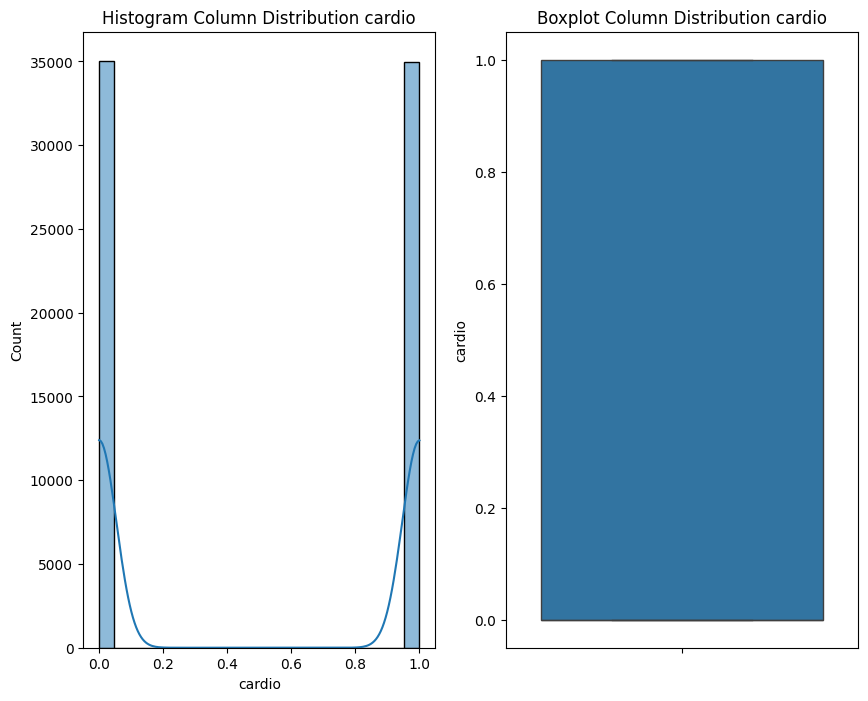

In [50]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f"Histogram Column Distribution {col}")
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Boxplot Column Distribution {col}")

## B. Data Preprocessing

### B.1 Feature Engineering

#### Creating New Column

Age (Years)

In [51]:
df['age_years'] = (df['age'] / 365.25).astype(int)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47


Body Mass Index (BMI)

In [52]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177


#### Creating A Column Category

Age Category

In [53]:
def age_category(age):
    if age < 40:
        return "Young Adult"
    elif age < 60:
        return "Middle Aged"
    else:
        return "Elderly"

df['age_category'] = df['age_years'].apply(age_category)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged


Body Mass Index Category

In [54]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category,bmi_category
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged,Normal Weight
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged,Obese
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged,Normal Weight
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged,Overweight
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged,Normal Weight


### B.2 Drop Unrelated Columns

In [55]:
df.drop(columns=['Unnamed: 0', 'id', 'age'], inplace=True)

### B.3 Cleaning Data

In [56]:
df.shape

(70000, 15)

In [57]:
df = df[(df['ap_hi'] < 250) & (df['ap_hi'] > 60)]
df = df[(df['ap_lo'] < 150) & (df['ap_lo'] > 40)]

df = df[df['ap_hi'] >= df['ap_lo']]

df.shape

(68651, 15)

### B.4 Mapping Label

In [60]:
cardiovascular_mapping = {0 : "Negative", 1 : "Positive"}
df['cardio_sign'] = df['cardio'].map(cardiovascular_mapping)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,age_category,bmi_category,cardio_sign
0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50,21.967120,Middle Aged,Normal Weight,Negative
1,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55,34.927679,Middle Aged,Obese,Positive
2,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51,23.507805,Middle Aged,Normal Weight,Positive
3,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48,28.710479,Middle Aged,Overweight,Positive
4,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47,23.011177,Middle Aged,Normal Weight,Negative


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

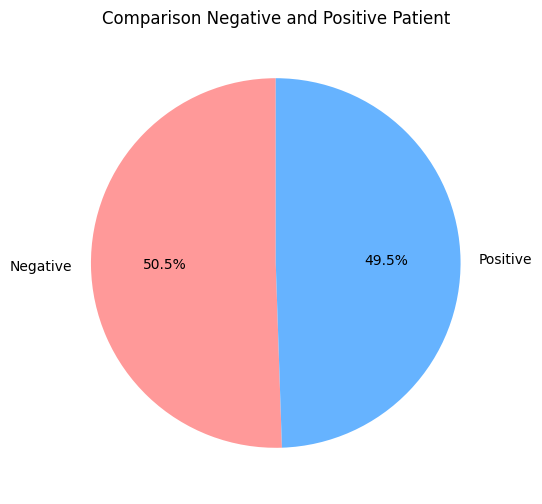

In [61]:
plt.figure(figsize=(6, 6))
df['cardio_sign'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Comparison Negative and Positive Patient')
plt.ylabel(None)
plt.show()

## D. Modelling

## E. Evaluation